In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [41]:
def show_image(img, text=None):
    if text:
        plt.title(text)
    plt.imshow(img, cmap=plt.cm.gray)
    plt.show()

def print_stats(list_of_images):
    min_v = min([np.amin(image) for image in list_of_images])
    max_v = max([np.amax(image) for image in list_of_images])
    print(f'Min {min_v} Max {max_v}')

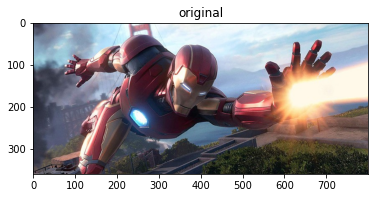

In [42]:
img = cv2.imread('iron.jpg')
show_image(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), 'original')

In [53]:
print(img.shape)

(360, 800, 3)


### Conv 5 filters (3x3x3)

In [58]:
def conv(img, kernels):
    assert np.all([kernel.shape == (3,3,3) for kernel in kernels])
    f_w, f_h, f_l = kernels[0].shape
    w, h, l = img.shape

    convoluted = np.zeros((len(kernels), w-f_w+1, h-f_h+1))
    for i, kernel in enumerate(kernels):
        for w in range(convoluted.shape[1]):
            for h in range(convoluted.shape[2]):    
                convoluted[i,w,h] = np.sum(img[w:w+f_w, h:h+f_h, :]*kernel)
    return convoluted    

In [59]:
def generate_filter_x3(filter):
    return np.array([np.array([np.array(line) for line in filter])]*3)

flat_kernels = [[[1, 1, 1],
                 [-1, -1, -1],
                 [1, 1, 1]],

                [[1, -1, 1],
                 [1, -1, 1],
                 [1, -1, 1]],

                [[1, -1, 0],
                 [1, -1, 0],
                 [1, -1, 0]],
                
                [[-1, 1, 0],
                 [-1, 1, 0],
                 [-1, 1, 0]],
                 
                [[0, 0, 0],
                 [0, 1, 0],
                 [0, 0, 0]]]

list_of_convoluted = conv(img, list(map(generate_filter_x3, flat_kernels)))
print_stats(list_of_convoluted)

Min -764.0 Max 2795.0


### Normalization

In [70]:
def normalize(list_of_images):
    result = np.zeros(list_of_images.shape)
    for i, image in enumerate(list_of_images):
        mean = np.mean(image)
        result[i] = image - mean

        min = np.amin(image)
        max = np.amax(image)
        result[i] = 2*((image-min)/(max-min+0.000000000000000)-0.5)
    return result

normalized = normalize(list_of_convoluted)
print_stats(normalized)

Min -1.0 Max 1.0


### Relu

In [71]:
def relu(list_of_images):
    result = np.zeros(list_of_images.shape)
    for i, image in enumerate(list_of_images):
        result[i] = np.array([list(map(lambda x: x if x >= 0 else 0, row)) for row in image])
    return result
    
after_relu = relu(normalized)
print_stats(after_relu)

Min 0.0 Max 1.0


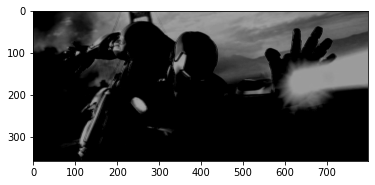

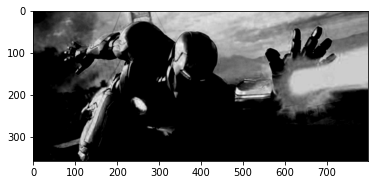

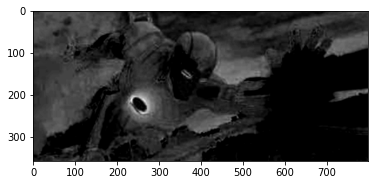

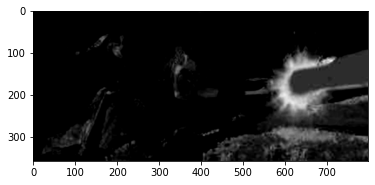

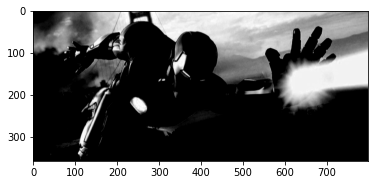

In [72]:
for temp_img in after_relu:
    show_image((255*temp_img).astype(np.int64))

### Max Pooling 2x2

Min 0.0 Max 1.0


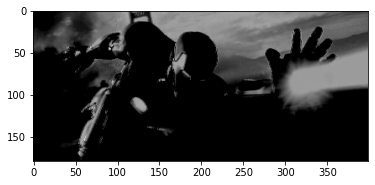

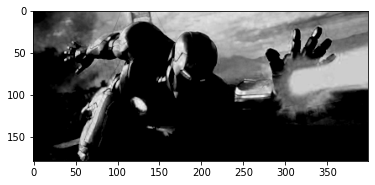

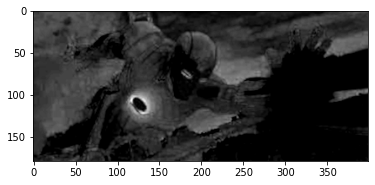

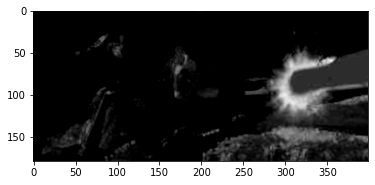

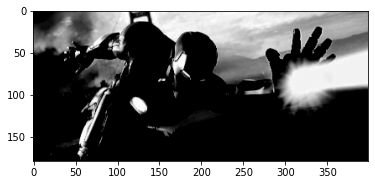

In [79]:
def max_pooling(list_of_images):
    count, w, h = list_of_images.shape
    result = np.zeros((count, int(w/2), int(h/2)))

    for i, image in enumerate(list_of_images):
        for w in range(result.shape[1]):
            for h in range(result.shape[2]):    
                result[i,w,h] = np.amax(image[(2*w):(2*w)+2, (2*h):(2*h)+2])
    return result  

pooled = max_pooling(after_relu)
print_stats(pooled)

for temp_img in pooled:
    show_image((255*temp_img).astype(np.int64))

### SoftMax per pixel

[0.18944094 0.18944094 0.24223624 0.18944094 0.18944094] 0.9999999999999999


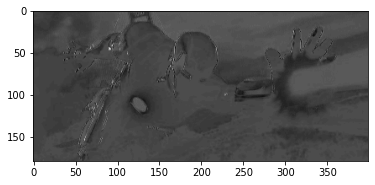

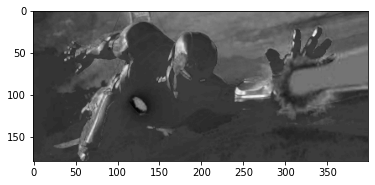

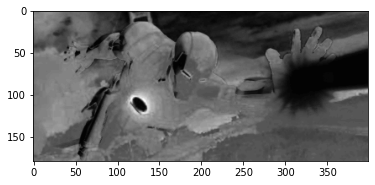

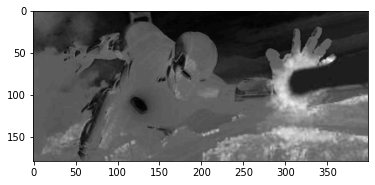

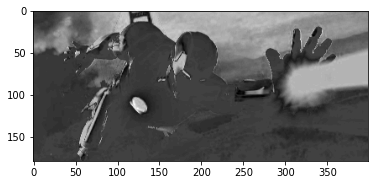

In [91]:
def softmax(list_of_images):
    count, w, h = list_of_images.shape
    result = np.zeros((count, w, h))
    for w in range(result.shape[1]):
        for h in range(result.shape[2]):
            e_x = np.exp(list_of_images[:, w, h])
            result[:, w, h] = e_x / e_x.sum(axis=0)
    return result
result = softmax(pooled)

print(result[:, 0, 0], np.sum(result[:, 0, 0]))

for temp_img in result:
    show_image((255*temp_img).astype(np.int64))